In [115]:
import numpy as np
import matplotlib.pyplot as plt
import collections
import pickle
import copy
import os
from tqdm import tqdm

In [82]:
def load_malscraps(target):
    loaded = {}
    dropped = []
    for item in os.listdir(target):
        dump = pickle.load(open(f"{target}/{item}", "rb"))
        for ent in dump[0].items():
            loaded[ent[0]] = ent[1]
        dropped += dump[1]
    print(f"loaded {len(loaded.items())} items in total.")
    return loaded
        
malscrap = load_malscraps("MALscrap/")

loaded 5845 items in total.


In [83]:
def load_boorucharmap():
    character2anime = collections.defaultdict(lambda: [])
    bindings = collections.defaultdict(lambda: 0)
    for animename in os.listdir("animedump"):
        for character in os.listdir(f"animedump/{animename}"):
            if character in character2anime.keys():
                bindings[(animename, character2anime[character])] += 1
            else:
                character2anime[character[:-4]].append(animename)
                
    #for l in list(sorted([(t[1], t[0]) for t in bindings.items()], reverse=True)):
    #    print(l)
    print(f"loaded {len(character2anime.keys())} bindings.")
    return character2anime

character2anime = load_boorucharmap()
    

loaded 29951 bindings.


100%|██████████| 10000/10000 [00:00<00:00, 39326.93it/s]


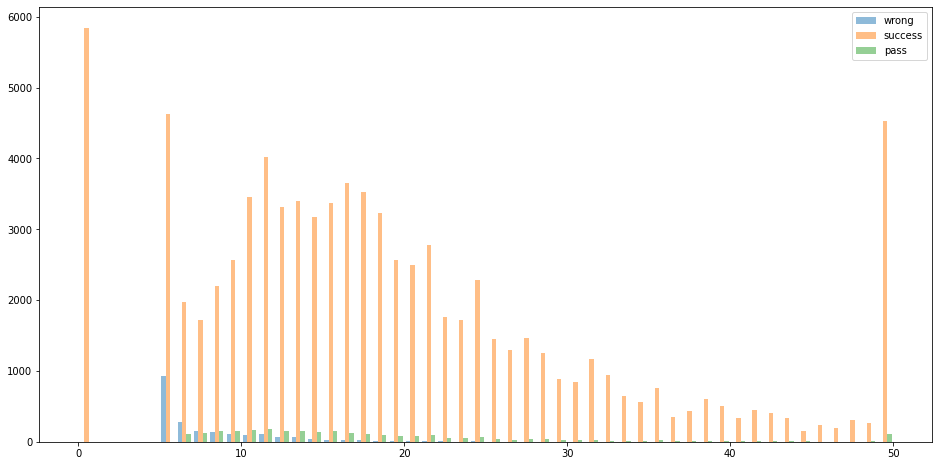

84073 2130 2775


In [197]:
def fetch_bindings(target, malscrap, character2anime):
    animename, characters = malscrap[target]
    #print(f"workon {animename}")
    bindcount = collections.defaultdict(lambda: 0)
    usfcnt = 0
    for charactername, _ in characters:
        fetch = charactername.lower()
        candidates = copy.deepcopy(character2anime[fetch])
        if "_" in fetch and len(fetch.split("_")) == 2:
            t = fetch.split("_")
            nf = t[1] + "_" + t[0]
            candidates += character2anime[nf]
        if len(candidates) > 0:
            usfcnt += 1
        for c in candidates:
            bindcount[c] += 1
            
    if len(characters) < 2:
        raise NotImplemented
    mb = max(t[1] for t in bindcount.items())
    sl = list(sorted([(t[1], t[0]) for t in bindcount.items()], reverse=True))

    if sl[0][0] < usfcnt*0.60:
        return (False, min(len(characters), 50))
    return (True, min(len(characters), 50), sl[0])

a = fetch_bindings(21, malscrap, character2anime)
ksamplesizes = []
wsamplesizes = []
misss = []
for animeit in tqdm(range(10000)):
    try:
        a = fetch_bindings(animeit, malscrap, character2anime)
        if a[0] == True:
            if a[2][1] == 'death_note':
                wsamplesizes.append(a[1])
            else:
                samplesizes.append(a[1])
        else:
            misss.append(a[1])
    except Exception as e:
        pass
    
ss = np.array(samplesizes)
sw = np.array(wsamplesizes)
sm = np.array(misss)
fig = plt.figure(figsize=(16,8))
plt.hist([sw, ss, sm], 50, alpha=0.5, label = ['wrong', 'success', 'pass'])
plt.legend(loc='upper right')
plt.show()
print(len(ss), len(sw), len(sm))

lelouch_lamperouge
hatsune_miku
hiro
uzumaki_naruto
monkey_d_luffy
yuno
ryuk
son_gokuu
rem
miyako
amane_misa
yagami_sayu
aizawa_shuuichi
near
matt
l
mello
mogi_kanzou
mikami_teru
watari
yagami_light
yagami_souichirou
misora_naomi
sae
matsuda_touta
jealous
